## 0. Import Data

In [76]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
np.set_printoptions(precision=6)

In [77]:
# import data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

## 1. Select the numeric variables

In [78]:
#  CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population
#  MEDV     Median value of owner-occupied homes in $1000's -- y
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


<b>I would delete the 'B' column. This dataset includes this column "assuming that racial self-segregation had a positive impact on house prices", which causes ethical problems. I think it would not be reasonable and proper to keep this column.

In [79]:
# Feature Selection
# Delete the 'B' column
X = np.delete(X, 11, 1)

<b>Then, I use the feature selection function with f-test to select proper variables. As a result, I keep 'CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT' for clustering. 
\
From the selection result, I delete 'ZN', 'CHAS', 'DIS', 'PTRATIO'. From reality perspective consideration, the housing price would have less relation with these factors as well.

In [80]:
# Use ANOVA f-test to select 8 best variables.
sel_f = SelectKBest(f_classif, k=8)
X_f = sel_f.fit_transform(X, y)
print(sel_f.get_support())
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
print(colnames)

[ True False  True False  True  True  True False  True  True False  True]
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


In [81]:
X = np.delete(X, [1, 3, 7, 10], 1)
colnames = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT', 'MEDV']

In [82]:
y_temp = y.reshape(506, 1)
data = np.concatenate((X, y_temp), axis=1)

In [83]:
df = pd.DataFrame(data, columns=colnames)
df

,CRIM,INDUS,NOX,RM,AGE,RAD,TAX,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,1.0,296.0,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,2.0,242.0,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,2.0,242.0,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,3.0,222.0,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,3.0,222.0,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,1.0,273.0,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,1.0,273.0,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,1.0,273.0,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,1.0,273.0,6.48,22.0


In [95]:
df.describe()

,CRIM,INDUS,NOX,RM,AGE,RAD,TAX,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,9.549407,408.237154,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148861,8.707259,168.537116,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.000000,187.000000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,4.000000,279.000000,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,5.000000,330.000000,11.360000,21.200000
75%,3.677082,18.100000,0.624000,6.623500,94.075000,24.000000,666.000000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,24.000000,711.000000,37.970000,50.000000


In [ ]:
plt.figure(figsize=(15, 10))
variables = df.drop(columns='MEDV')
for i, col in enumerate(variables.columns):
    # 3 plots here hence 1, 3
    plt.subplot(2, 4, i+1)
    x = df[col]
    plt.plot(x, y, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

## 2. Split and Scale the data

In [38]:
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [39]:
# Scale the test set using the mean and standard deviation of the training set.
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Generate the K-means solution. Extract 2-10 k-means clusters using the variable set.

In [40]:
# create a loop for 2-10 clusters. Use only train set
r_square = []
cluster_proportion = []
center_of_cluster = []
cluster_size = []
train_labels = []
for k in range(2,11):
    print("Now using k = ", k)
    x = KMeans(n_clusters=k, n_init=100, max_iter=300, tol=0.0001, verbose=0, random_state = 20).fit(X_train_scaled)
    x.fit_predict(X_train_scaled)

    centroids = x.cluster_centers_
    labels = x.labels_
    train_labels.append(labels)

    center_of_cluster.append(centroids)

    centroids_dataframe = pd.DataFrame(data=centroids)
    centroids_matrix = centroids_dataframe.values
    print("\nThe cluster sizes are", np.bincount(labels))
    cluster_size.append(np.bincount(labels))
    prop = np.bincount(labels)/len(labels)
    print("The cluster proportions are", prop)
    cluster_proportion.append(prop)

    shap = (len(X_train_scaled),k)
    cluster_matrix = np.zeros(shap)

    for i in range(k):     
        cluster_matrix[x.labels_ == i,i] = 1.0

    predicted_data = np.dot(cluster_matrix, centroids_matrix)
    shap2 = (len(X_train_scaled)*3,1)
    r_2 = (np.corrcoef(predicted_data.ravel(), X_train_scaled.ravel())[0,1])**2
    r_square.append(r_2)
    print("\nThe R-Square for", k, "clusters is", r_2)
    print("---------------------------------------------------------------------")

Now using k =  2

The cluster sizes are [230 124]
The cluster proportions are [0.649718 0.350282]

The R-Square for 2 clusters is 0.47610326086584903
---------------------------------------------------------------------
Now using k =  3

The cluster sizes are [176  88  90]
The cluster proportions are [0.497175 0.248588 0.254237]

The R-Square for 3 clusters is 0.5957758547075623
---------------------------------------------------------------------
Now using k =  4

The cluster sizes are [ 78 131  87  58]
The cluster proportions are [0.220339 0.370056 0.245763 0.163842]

The R-Square for 4 clusters is 0.6511455680905183
---------------------------------------------------------------------
Now using k =  5

The cluster sizes are [133  67  42  91  21]
The cluster proportions are [0.375706 0.189266 0.118644 0.257062 0.059322]

The R-Square for 5 clusters is 0.7054992251062363
---------------------------------------------------------------------
Now using k =  6

The cluster sizes are [ 42 

## 4&5. Scree Test for KMeans

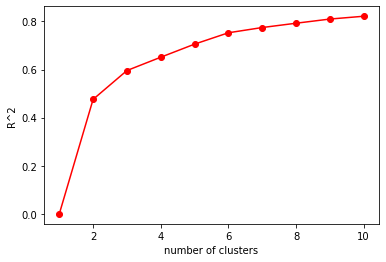

In [41]:
# Perform Scree test
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r_square.insert(0, 0)

plt.plot(x, r_square, 'o-', color='r')
plt.xlabel("number of clusters")
plt.ylabel("R^2")
plt.show()

# k = 3 would be a proper choice for the number of cluster according to the plot

In [42]:
r_square

[0,
 0.47610326086584903,
 0.5957758547075623,
 0.6511455680905183,
 0.7054992251062363,
 0.7527026291322959,
 0.7744920990065542,
 0.7923708348703791,
 0.8096896684911503,
 0.8214022619022918]

## 6. Run KMeans on test data

<b>From the scree plot, I would say that k=3 is a proper choice. So here I choose k_opt to be 3.

In [59]:
# Run Kmeans (the K selected in step 4) on the test data set with the centers of the clusters from the train data solution as a starting point. 
# Show the VAFs, cluster sizes, and centroids of both the training set and test set at the best K. 
k_opt = 3

x = KMeans(n_clusters=k_opt, n_init=100, max_iter=300, tol=0.0001, verbose=0, random_state = 20).fit(X_train_scaled)
pred = x.predict(X_test_scaled)

centroids = x.cluster_centers_
test_labels_kmeans = pred
print('Best K = ', k_opt)
print('\nCenters for the clusters are for test set: ') 
print(centroids.T)
print('\nCenters for the clusters are for train set: ') 
print(center_of_cluster[k_opt-2].T)

centroids_dataframe = pd.DataFrame(data=centroids)
centroids_matrix = centroids_dataframe.values
print("\nThe cluster sizes for test set are", np.bincount(test_labels_kmeans))
print("The cluster sizes for train set are", cluster_size[k_opt-2])
print("The cluster proportions for test set are", np.bincount(test_labels_kmeans)/len(test_labels_kmeans))
print("The cluster proportions for train set are", cluster_proportion[k_opt-2])

shap = (len(X_test_scaled),k_opt)
cluster_matrix = np.zeros(shap)

for i in range(k_opt):     
    cluster_matrix[pred == i,i] = 1.0

predicted_data = np.dot(cluster_matrix, centroids_matrix)
shap2 = (len(X_test_scaled)*3,1)
r_2 = (np.corrcoef(predicted_data.ravel(), X_test_scaled.ravel())[0,1])**2
print("\nThe R-Square of test set for", k_opt, "clusters is", r_2)

# Compare and interpret. A good selection of K should be at the “elbow” and presents a decent level of stability 
# (VAF, centroids, and cluster sizes should be similar/unchanged between train and test). 
# Does your model demonstrate these qualities?
print("The R-Square of train set for", k_opt, "clusters is", r_square[k_opt-1])

Best K =  3

Centers for the clusters are for test set: 
[[-0.426571  1.198309 -0.337497]
 [-0.817257  0.974472  0.645375]
 [-0.758131  0.978715  0.525602]
 [ 0.406125 -0.461788 -0.342673]
 [-0.778084  0.734834  0.803082]
 [-0.562345  1.715216 -0.577403]
 [-0.681154  1.551772 -0.185255]
 [-0.653792  0.865868  0.4319  ]]

Centers for the clusters are for train set: 
[[-0.426571  1.198309 -0.337497]
 [-0.817257  0.974472  0.645375]
 [-0.758131  0.978715  0.525602]
 [ 0.406125 -0.461788 -0.342673]
 [-0.778084  0.734834  0.803082]
 [-0.562345  1.715216 -0.577403]
 [-0.681154  1.551772 -0.185255]
 [-0.653792  0.865868  0.4319  ]]

The cluster sizes for test set are [70 44 38]
The cluster sizes for train set are [176  88  90]
The cluster proportions for test set are [0.460526 0.289474 0.25    ]
The cluster proportions for train set are [0.497175 0.248588 0.254237]

The R-Square of test set for 3 clusters is 0.5619436964012801
The R-Square of train set for 3 clusters is 0.5957758547075623


### Compare and interpret

*A good selection of K should be at the “elbow” and presents a decent level of stability 
(VAF, centroids, and cluster sizes should be similar/unchanged between train and test). Does your model demonstrate these qualities?*

<b>From the above Scree plot, we could see that k = 3 is at the "elbow". Since we use the same centroids to make prediction for test data, the centers of clusters for both train and test data are the same. The R^2 is similar for the train data and test data. Also, the cluster proportions are similar as well, which indicates that the selection of k=3 presents a decent level of stability and is a proper choice.

## 7. Gaussian Mixture

In [51]:
aic = []
bic = []
# 3
GM = GaussianMixture(n_components=3, n_init=100, random_state=20)
mixresults=GM.fit(X_train_scaled)

print(mixresults.means_)
# print(mixresults.aic)
# print(mixresults.bic)
print(GM.predict(X_train_scaled))

labels = GM.predict(X_train_scaled)
#print(GM.predict_proba(X_train_scaled))
print(GM.aic(X_train_scaled))
print(GM.bic(X_train_scaled))
aic.append(GM.aic(X_train_scaled))
bic.append(GM.bic(X_train_scaled))

[[ 1.198309  0.974472  0.978715 -0.461788  0.734834  1.715216  1.551772
   0.865868]
 [-0.3109    0.67414   0.687518 -0.185928  0.775924 -0.592339 -0.251886
   0.400924]
 [-0.431812 -0.734576 -0.742093  0.29287  -0.664606 -0.557141 -0.621526
  -0.570774]]
[0 0 2 0 1 2 2 0 1 2 0 1 0 2 2 1 1 2 1 1 2 0 2 2 2 0 2 2 2 2 1 2 0 1 2 1 1
 1 1 1 2 1 2 2 2 2 0 2 1 1 2 2 2 2 0 1 2 1 0 0 0 2 0 1 0 2 0 0 2 2 2 2 1 2
 0 0 0 1 2 0 0 2 2 1 0 0 2 2 1 1 0 2 1 2 1 1 1 0 2 2 2 1 0 2 1 2 2 2 1 2 2
 2 2 0 0 2 2 0 1 2 0 2 0 0 2 0 2 1 2 2 2 0 0 2 2 2 2 0 0 0 2 0 2 2 1 1 1 2
 2 2 1 1 1 2 2 0 1 2 2 2 1 1 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 2 0 1 2 2 2 2 2
 2 0 0 2 0 0 0 1 2 2 2 2 2 1 1 2 2 2 2 2 1 2 0 1 2 1 2 2 2 0 2 2 2 0 2 0 2
 1 2 1 2 2 2 1 2 0 0 2 2 0 1 2 2 0 2 2 1 2 0 1 2 0 2 0 2 2 2 2 2 1 2 1 1 1
 1 2 2 2 2 2 2 0 2 1 0 2 2 1 0 1 0 1 2 1 1 2 2 0 2 2 2 2 2 0 2 2 2 0 0 0 1
 2 2 2 0 2 2 2 0 1 2 2 1 1 2 0 0 2 0 2 2 2 0 1 0 0 1 1 2 2 1 0 2 1 2 0 2 2
 2 0 2 2 2 0 2 2 0 1 2 2 2 0 0 2 0 2 2 0 2]
-371.5254878374153
146.96

In [52]:
# 4
GM = GaussianMixture(n_components=4, n_init=100, random_state=20)
mixresults=GM.fit(X_train_scaled)

print(mixresults.means_)
# print(mixresults.aic)
# print(mixresults.bic)
print(GM.predict(X_train_scaled))

labels = GM.predict(X_train_scaled)
# print(GM.predict_proba(X_train_scaled))
print(GM.aic(X_train_scaled))
print(GM.bic(X_train_scaled))
aic.append(GM.aic(X_train_scaled))
bic.append(GM.bic(X_train_scaled))

[[-0.357779  0.275455  0.209185 -0.107147  0.603655 -0.570008 -0.399741
   0.262811]
 [-0.222221  1.5278    2.098795 -0.863725  0.975628 -0.542904  0.515416
   0.924989]
 [-0.432651 -0.797172 -0.825246  0.380644 -0.773821 -0.568685 -0.672085
  -0.673274]
 [ 1.198309  0.974472  0.978715 -0.461788  0.734834  1.715216  1.551772
   0.865868]]
[3 3 2 3 0 2 2 3 0 2 3 0 3 2 2 0 0 2 1 0 2 3 2 2 2 3 2 2 2 0 0 2 3 0 2 0 1
 0 0 0 2 0 2 0 2 2 3 2 1 0 2 2 2 2 3 0 0 0 3 3 3 2 3 0 3 0 3 3 2 2 2 0 0 2
 3 3 3 0 2 3 3 2 2 0 3 3 0 2 0 0 3 2 0 2 0 0 1 3 2 2 2 0 3 2 0 2 2 2 0 2 2
 2 2 3 3 2 2 3 0 2 3 2 3 3 2 3 2 0 2 2 2 3 3 2 2 0 2 3 3 3 2 3 2 2 1 0 0 2
 2 2 0 0 0 2 2 3 0 2 0 2 0 0 2 2 0 2 2 3 2 3 0 0 2 2 0 3 2 2 3 1 2 2 2 2 2
 2 3 3 2 3 3 3 1 2 2 2 2 2 0 0 2 2 2 2 2 1 2 3 0 2 1 2 2 2 3 0 2 2 3 2 3 2
 0 2 1 2 2 2 1 2 3 3 2 2 3 1 2 2 3 2 2 1 2 3 0 2 3 2 3 2 2 2 2 2 0 2 0 0 0
 0 2 2 2 2 0 2 3 2 0 3 2 2 0 3 0 3 0 2 1 0 2 2 3 2 2 2 2 2 3 2 2 2 3 3 3 1
 2 2 2 3 0 2 2 3 0 2 0 0 0 2 3 3 2 3 0 2 2 3 0 3 3 0 1 2 2 

In [53]:
# 5
GM = GaussianMixture(n_components=5, n_init=100, random_state=20)
mixresults=GM.fit(X_train_scaled)

print(mixresults.means_)
# print(mixresults.aic)
# print(mixresults.bic)
print(GM.predict(X_train_scaled))

labels = GM.predict(X_train_scaled)
# print(GM.predict_proba(X_train_scaled))
print(GM.aic(X_train_scaled))
print(GM.bic(X_train_scaled))
aic.append(GM.aic(X_train_scaled))
bic.append(GM.bic(X_train_scaled))

[[-0.135957  1.185535  2.766773 -0.829355  0.998153 -0.508482 -0.029104
   0.857222]
 [-0.437363 -0.80281  -0.869157  0.288818 -0.85511  -0.605455 -0.678566
  -0.645498]
 [ 1.198309  0.974472  0.978715 -0.461788  0.734834  1.715216  1.551772
   0.865868]
 [-0.38021  -0.508467 -0.04912   0.165731  0.322291 -0.458853 -0.534818
   0.030598]
 [-0.337127  1.613122  0.486731 -0.130254  0.946272 -0.625518  0.083902
   0.29642 ]]
[2 2 1 2 3 3 1 2 4 1 2 3 2 1 1 3 4 1 4 4 1 2 3 1 1 2 3 3 1 3 3 1 2 3 1 4 4
 3 3 3 1 3 1 3 1 1 2 1 0 3 1 1 1 1 2 4 3 3 2 2 2 3 2 4 2 3 2 2 1 1 1 3 4 3
 2 2 2 4 1 2 2 1 1 3 2 2 3 1 4 3 2 1 4 1 3 3 0 2 1 1 1 3 2 1 4 1 1 1 3 1 1
 1 1 2 2 1 3 2 3 1 2 3 2 2 1 2 1 4 1 1 1 2 2 1 1 3 3 2 2 2 1 2 1 1 0 4 4 1
 1 3 4 4 4 1 1 2 4 1 3 1 3 4 1 3 3 1 1 2 1 2 3 3 1 1 1 2 1 1 2 0 1 1 1 1 1
 1 2 2 1 2 2 2 0 1 1 1 1 1 4 4 1 1 1 1 1 0 1 2 4 1 0 1 1 1 2 3 1 1 2 1 2 3
 4 1 4 1 3 1 0 1 2 2 1 3 2 0 1 1 2 3 1 0 1 2 3 1 2 1 2 1 1 1 1 1 4 1 4 4 4
 3 1 1 1 1 3 1 2 3 4 2 1 1 3 2 3 2 3 1 0 3 1 1 2 

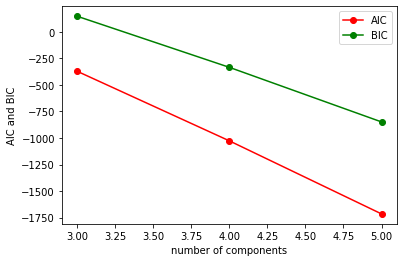

In [54]:
x = [3, 4, 5]
plt.plot(x, aic, 'o-', color='r', label="AIC")
plt.plot(x, bic, 'o-', color='g', label="BIC")
plt.xlabel("number of components")
plt.ylabel("AIC and BIC")
plt.legend()
plt.show()


## 8. Choose the best GaussianMixture model & compare with KMmeans

<b>Since we want to choose the model with lowest AIC/BIC value, we use n_components = 5.

In [87]:
# Build a GM model with the best components on train data

# Consider restoring centers to original scales by reversing the scale function you chose. 
# This enables us to interpret variables under their original business context.
GM = GaussianMixture(n_components=5, n_init=100, random_state=20)
mixresults=GM.fit(X_train_scaled)

print(mixresults.means_)
# print(mixresults.aic)
# print(mixresults.bic)
print(GM.predict(X_train_scaled))

labels_GM = GM.predict(X_train_scaled)
# print(GM.predict_proba(X_train))
print(GM.aic(X_train_scaled))
print(GM.bic(X_train_scaled))
aic.append(GM.aic(X_train_scaled))
bic.append(GM.bic(X_train_scaled))

[[-0.135957  1.185535  2.766773 -0.829355  0.998153 -0.508482 -0.029104
   0.857222]
 [-0.437363 -0.80281  -0.869157  0.288818 -0.85511  -0.605455 -0.678566
  -0.645498]
 [ 1.198309  0.974472  0.978715 -0.461788  0.734834  1.715216  1.551772
   0.865868]
 [-0.38021  -0.508467 -0.04912   0.165731  0.322291 -0.458853 -0.534818
   0.030598]
 [-0.337127  1.613122  0.486731 -0.130254  0.946272 -0.625518  0.083902
   0.29642 ]]
[2 2 1 2 3 3 1 2 4 1 2 3 2 1 1 3 4 1 4 4 1 2 3 1 1 2 3 3 1 3 3 1 2 3 1 4 4
 3 3 3 1 3 1 3 1 1 2 1 0 3 1 1 1 1 2 4 3 3 2 2 2 3 2 4 2 3 2 2 1 1 1 3 4 3
 2 2 2 4 1 2 2 1 1 3 2 2 3 1 4 3 2 1 4 1 3 3 0 2 1 1 1 3 2 1 4 1 1 1 3 1 1
 1 1 2 2 1 3 2 3 1 2 3 2 2 1 2 1 4 1 1 1 2 2 1 1 3 3 2 2 2 1 2 1 1 0 4 4 1
 1 3 4 4 4 1 1 2 4 1 3 1 3 4 1 3 3 1 1 2 1 2 3 3 1 1 1 2 1 1 2 0 1 1 1 1 1
 1 2 2 1 2 2 2 0 1 1 1 1 1 4 4 1 1 1 1 1 0 1 2 4 1 0 1 1 1 2 3 1 1 2 1 2 3
 4 1 4 1 3 1 0 1 2 2 1 3 2 0 1 1 2 3 1 0 1 2 3 1 2 1 2 1 1 1 1 1 4 1 4 4 4
 3 1 1 1 1 3 1 2 3 4 2 1 1 3 2 3 2 3 1 0 3 1 1 2 

<b><font color='red'><font size="4">Compare it with the train KMeans solution from an interpretability perspective.

In [84]:
variables = colnames[0:len(colnames)-1]

['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT']

In [88]:
GM_centers_original = pd.DataFrame(scaler.inverse_transform(mixresults.means_), columns=variables)
GM_centers_original

,CRIM,INDUS,NOX,RM,AGE,RAD,TAX,LSTAT
0,2.384376,19.580000,0.871000,5.670417,96.483333,5.000000,403.000000,18.929167
1,0.090034,5.637500,0.451554,6.483912,42.679101,4.171425,294.953239,7.862391
2,12.540977,18.100000,0.664727,5.937830,88.838636,24.000000,666.000000,18.992841
3,0.525089,7.701467,0.546155,6.394364,76.861603,5.424046,318.867575,12.841499
4,0.853047,22.578286,0.607971,6.179029,94.977143,4.000000,421.800000,14.799143


In [89]:
KMean_centers_original = pd.DataFrame(scaler.inverse_transform(centroids), columns=variables)
KMean_centers_original

,CRIM,INDUS,NOX,RM,AGE,RAD,TAX,LSTAT
0,0.172187,5.536193,0.464363,6.569256,44.915341,4.539773,294.522727,7.801307
1,12.540977,18.100000,0.664727,5.937830,88.838636,24.000000,666.000000,18.992841
2,0.850229,15.792333,0.612456,6.024489,90.820000,4.411111,377.022222,15.796889


<b>I list the center of KMeans clusters and GaussianMixture clusters together, and I found that cluster 2 in GaussainMixture has the same center as KMeans. \
And center of cluster 2 in GM is close to the center of cluster 0 in KMeans; center of cluster 4 in GM is close to the center of cluster 2 in KMeans.

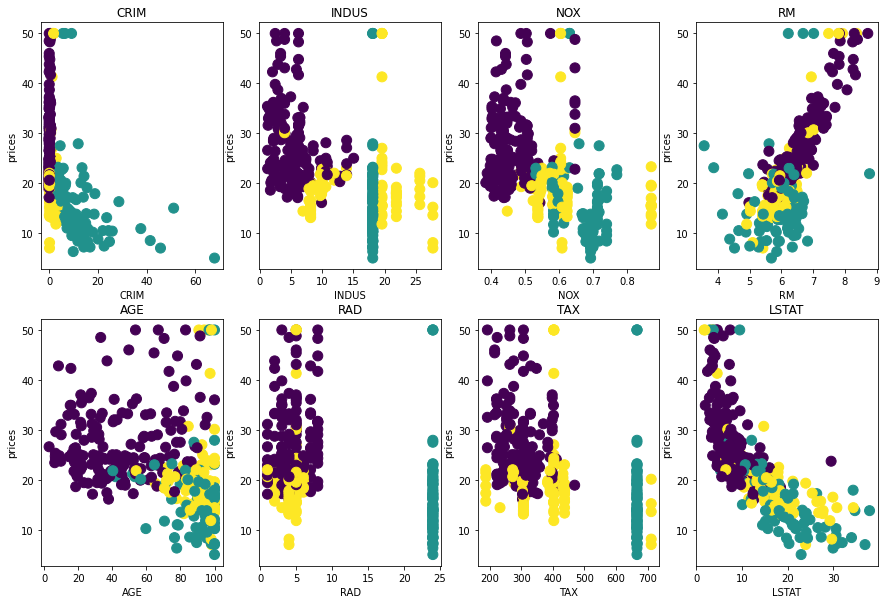

In [93]:
plt.figure(figsize=(15, 10))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.scatter(X_train[:, i], y_train, c=train_labels[k_opt-2], s=100, cmap='viridis')
    plt.title(variables[i])
    plt.xlabel(variables[i])
    plt.ylabel('prices')

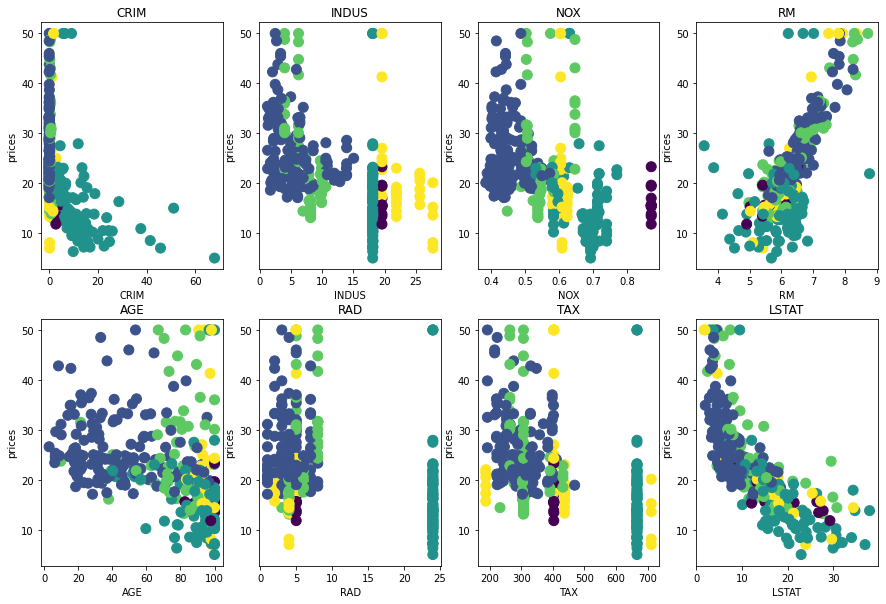

In [94]:
plt.figure(figsize=(15, 10))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.scatter(X_train[:, i], y_train, c=labels_GM, s=100, cmap='viridis')    
    plt.title(variables[i])
    plt.xlabel(variables[i])
    plt.ylabel('prices')

<b>I plot the clustering result for each variable against the y value for both GaussianMixture and KMeans models. By looking at the plot, I would say that the KMeans has a better clustering result since the boundary for each cluster is clearer than those of GaussianMixture. Some of the clusters are hard to distinguish in GaussianMixture result.

## 9. Summarize overall results and provide business-relevant insights from your analysis. 

<b><font color='red'><font size="4">Pick one model whose result makes more business sense to interpret. Write a short description for each cluster. What are some characteristics of these segments? How are they different from each other? Name your segment creatively if that helps with the demonstration.

<b>I choose the KMeans model with k=3 and I pick 3 variables, which have closer relationship with MEDV, to explain the result.

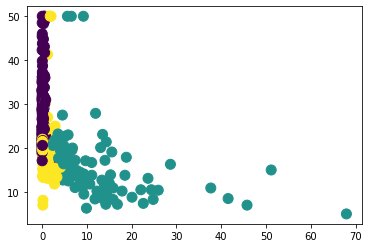

In [90]:
# CRIM
plt.scatter(X_train[:, 0], y_train, c=train_labels[k_opt-2], s=100, cmap='viridis')
plt.show()

<b>From the above plot, we could see that area with lower crime rate would have higher housing price while higher crime rate would result in lower housing price. This make sense since the demand for houses in these unsafe areas would be less and thus this causes a lower price.

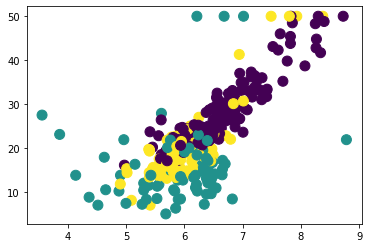

In [92]:
# RM
plt.scatter(X_train[:, 3], y_train, c=train_labels[k_opt-2], s=100, cmap='viridis')
plt.show()

<b>We would expect higher price with higher RM value. RM means the "average number of rooms per dwelling". A house with more rooms should have more space, and since the price of housing depends on the amount of space, the price would have a positive relationship with the number of rooms.

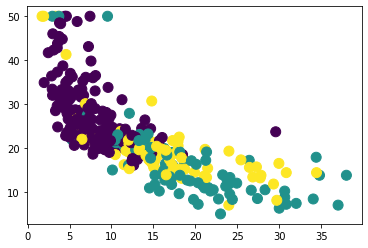

In [64]:
# LSTAT - % lower status of the population
# KMeans 3 cluster result.
plt.scatter(X_train[:, 7], y_train, c=train_labels[k_opt-2], s=100, cmap='viridis')
plt.show()

<b>We would expect a negative relationship between LSTAT and MEDV. The area with higher "lower status" proportion means that generally the citizens here are with lower income and living quality. Also, the security level would be relatively lower comparing to the area with more "upper status" people. Thus, to match the income of citizens here, the price would be lower.

---


<b><font color='red'><font size="4">Summary and Insight:</b></font></font>
\
<b>From the above analysis, we might conclude that a house with higher value would be in the region with lower crime rate, more average number of rooms, lower proportion of "lower status" citizens.
\
\
According to the plot of clustering result in the previous section, for other variables:\
<font color='blue'>RAD: housing with higher accessibility to radial highways generally have higher value.\
NOX: housing in the area with less NO concentration would have higher value.\
INDUS: lower proportion of non-retail business acres would result in higher housing value.\
AGE: The relationship of housing value and age of building is not very clear. But we could see that most of the housing with price lower than 20k has an age greater than 40.\
TAX: Similar to age, the relation between this full-value property-tax rate and housing value is not very clear. However, from the plot we could know that higher tax rate usually corresponds to lower value.</font>
\
\
To summarize the characteristics of the three cluster:\
<font color='purple'> *Purple cluster*: High value housing (low crime rate, low to medium proportion of non-retail business, low to medium NO concentration, medium to high average number of rooms, with various ages, low accessability to radial highway, low property tax rate, low proportion of "lower status" citizens in the area) </font>
\
\
<font color='orange'>*Yellow cluster*: Medium value housing (low crime rate, medium to high proportion of non-retail business, medium to high NO concentration, medium to high average number of rooms, medium to high housing ages, low accessability to radial highway, low to medium property tax rate, medium to high proportion of "lower status" citizens in the area)</font>
\
\
<font color='green'>*Green cluster*: Low value housing (medium to high crime rate, medium proportion of non-retail business, medium to high NO concentration, low average number of rooms, medium to high housing ages, high accessability to radial highway, high property tax rate, medium to high proportion of "lower status" citizens in the area)

<!-- #  CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population
#  MEDV     Median value of owner-occupied homes in $1000's -- y -->





## Reference
<b>https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html